<a href="https://colab.research.google.com/github/AanchalKankrecha/Playstore-Data-Analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

 **Import necessary librabries** 
 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Handshaking with google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading dataset**

In [3]:
play_store=pd.read_csv('/content/drive/MyDrive/Capstone Project/EDA/Play Store App Review Analysis/Play Store Data (1).csv')
user_review=pd.read_csv('/content/drive/MyDrive/Capstone Project/EDA/Play Store App Review Analysis/Copy of User Reviews.csv')

**Getting idea of the play_store dataset**

In [4]:
#play_store.head(-5)
play_store.loc[play_store['Type']=='0.0']
#play_store.loc(play_store['Type'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**Getting idea of the review dataset**

In [5]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**Rows and columns**

In [6]:
play_store.shape


(10841, 13)

In [7]:
user_review.shape

(64295, 5)

**Column names**

In [8]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [10]:
pd.DataFrame(pd.unique(play_store['App']))

,0
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book
...,...
9655,Sya9a Maroc - FR
9656,Fr. Mike Schmitz Audio Teachings
9657,Parkinson Exercices FR
9658,The SCP Foundation DB fr nn5n


In [11]:
pd.unique(play_store['Category'])

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
pd.unique(play_store['Type'])



array(['Free', 'Paid', nan, '0'], dtype=object)

In [13]:
pd.unique(play_store['Genres'])

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [14]:
play_store.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [16]:
play_store.drop(play_store[play_store['Installs']=='Free'].index,inplace=True)
play_store.shape

(10840, 13)

In [17]:
pd.DataFrame(play_store[['Current Ver','Android Ver']])

,Current Ver,Android Ver
0,1.0.0,4.0.3 and up
1,2.0.0,4.0.3 and up
2,1.2.4,4.0.3 and up
3,Varies with device,4.2 and up
4,1.1,4.4 and up
...,...,...
10836,1.48,4.1 and up
10837,1.0,4.1 and up
10838,1.0,2.2 and up
10839,Varies with device,Varies with device


In [18]:
set(play_store.columns) & set(user_review.columns)

{'App'}

In [19]:
df=pd.DataFrame(play_store[['Rating','Installs']])
type(df)

pandas.core.frame.DataFrame

In [20]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','') if x[-1]=='+' else x)
#df['Rating']=df['Rating'].round()
#type(df)

df['Installs'].unique()


array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [21]:

#df.drop(df[df['Installs']=='Free'].index, inplace = True)
#df
#df['Installs'].unique() 

In [22]:
df['Rating']=df['Rating'].fillna(0)
df 

,Rating,Installs
0,4.1,"10,000"
1,3.9,"500,000"
2,4.7,"5,000,000"
3,4.5,"50,000,000"
4,4.3,"100,000"
...,...,...
10836,4.5,"5,000"
10837,5.0,100
10838,0.0,"1,000"
10839,4.5,"1,000"


In [23]:
df.drop(df[df['Installs']=='F'].index,inplace=True)

In [24]:
df

,Rating,Installs
0,4.1,"10,000"
1,3.9,"500,000"
2,4.7,"5,000,000"
3,4.5,"50,000,000"
4,4.3,"100,000"
...,...,...
10836,4.5,"5,000"
10837,5.0,100
10838,0.0,"1,000"
10839,4.5,"1,000"


In [25]:
type(df['Installs'][1098])

str

In [26]:
df['Installs']=df['Installs'].apply(lambda x:x.replace(',',''))
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [27]:
df['Installs']=df['Installs'].astype(int)
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    0.0
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

In [28]:
df['Rating']=df['Rating'].round()

In [29]:
rating_install=df.groupby(['Rating'],as_index=False)['Installs'].sum()
rating_install

,Rating,Installs
0,0.0,5975549
1,1.0,13170
2,2.0,12622355
3,3.0,389136180
4,4.0,150271817710
5,5.0,16953868523


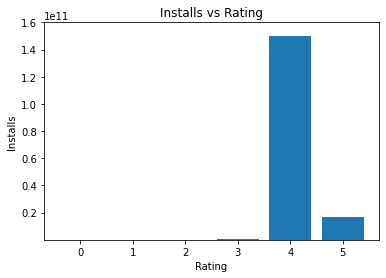

In [42]:
plt.bar(rating_install['Rating'],rating_install['Installs'])
plt.title('Installs vs Rating')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.ylim([13000,160000000000])
plt.show()